<a href="https://colab.research.google.com/github/lugsantistebanji/WCS-IA/blob/main/WCS_IA_Quetes_ML_Clustering_K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML CLUSTERING: K-MEANS

__imports :__

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics  import silhouette_score

__auxiliar functions__:

In [46]:
def get_k_means_analyse(X, n_clusters=2, print_in=True):
    modelKM = KMeans(n_clusters=n_clusters, random_state=42)
    modelKM.fit(X)

    clusters_centers = modelKM.cluster_centers_
    labels = modelKM.labels_
    inertia = modelKM.inertia_

    if print_in:
        print("------------------------------------------")

        print(f"--------------WITH {n_clusters} CLUSTERS-------------", end="\n\n")
        print("--------------- CLUSTER CENTERS ----------")

        print(clusters_centers, end="\n\n")

        print("--------------- LABELS ----------")
        print(labels, end="\n\n")

        print("--------------- INERTIA ----------")
        print(inertia, end="\n\n")

    return labels, clusters_centers, inertia

In [40]:
def get_graphics(dataframe, x_column, y_column, color_column, labels, x_cluster_centers, y_cluster_centers):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

    sns.scatterplot(data=dataframe, x=x_column, y=y_column, hue=labels, palette='viridis', ax=ax1)

    ax1.legend()
    ax1.set_title(f"With {len(set(labels))} clusters")
    ax1.scatter(x_cluster_centers, y_cluster_centers, color='green', marker='x', s=100, label="Cluster Center")

    sns.scatterplot(data=dataframe, x=x_column, y=y_column, hue=color_column, palette='coolwarm', ax=ax2)

    ax2.legend()
    ax2.set_title(f"{len(df[color_column].unique())} original species")

    plt.tight_layout()
    plt.show()


---
---

1. Dans scikit-learn, importe le dataset Iris, c'est un grand classique de la data. Il contient 3 espèces de fleurs (des iris) suivant leur longueur et largeur de pétale et de sépale.

In [28]:
link_file = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv"

df = pd.read_csv(link_file)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [30]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


---
---

2. Entraîne ton modèle pour qu’il trouve 3 clusters à partir des 4 colonnes numériques.

In [35]:
columns = list(set(df.columns).difference(['species']))
X = df[columns]

labels, clusters_centers, inertia = get_k_means_analyse(X, n_clusters=3)

['petal_length', 'sepal_length', 'sepal_width', 'petal_width']
------------------------------------------
--------------WITH 3 CLUSTERS-------------

--------------- CLUSTER CENTERS ----------
[[4.39354839 5.9016129  2.7483871  1.43387097]
 [1.462      5.006      3.428      0.246     ]
 [5.74210526 6.85       3.07368421 2.07105263]]

--------------- LABELS ----------
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]

--------------- INERTIA ----------
78.851441426146

3


---
---

3. Produis une visualisation comparant le dataset de base avec les classes générées par le K-means en t’inspirant de cette image. Tu peux prendre 2 dimensions de ton choix parmi les 4.

- Sur le graphique de gauche, tu dois afficher les points avec des couleurs différentes pour chaque cluster d'appartenance, ainsi que le centre de chaque cluster bien en évidence (ici les croix vertes).
    
- Sur le graphique de droite, tu dois afficher les points avec des couleurs différentes correspondant à leur espèce d'iris species.

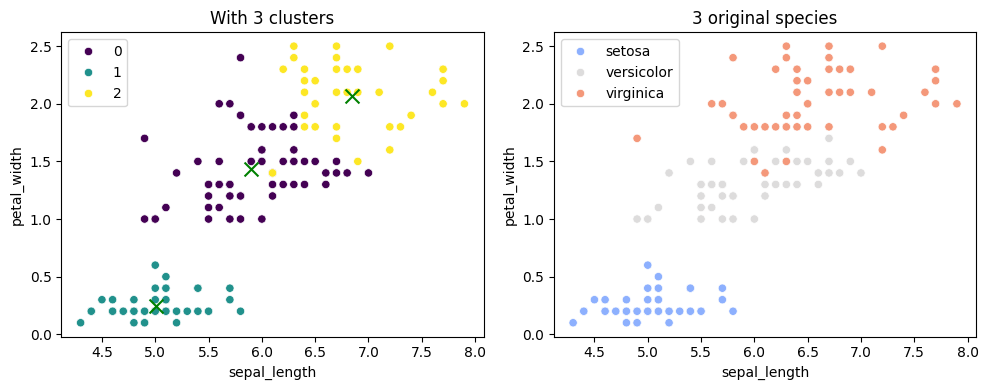

In [41]:
nb_col_x = 1
nb_col_y = 3
get_graphics(
    dataframe=df,
    x_column=columns[nb_col_x],
    y_column=columns[nb_col_y],
    color_column='species',
    labels=labels,
    x_cluster_centers=clusters_centers[:, nb_col_x],
    y_cluster_centers=clusters_centers[:, nb_col_y])

---
---

4. Entraine un autre modèle sur 2 clusters, puis affiche les mêmes graphiques

In [42]:
labels, clusters_centers, inertia = get_k_means_analyse(X, n_clusters=2)

------------------------------------------
--------------WITH 2 CLUSTERS-------------

--------------- CLUSTER CENTERS ----------
[[4.95876289 6.30103093 2.88659794 1.69587629]
 [1.56037736 5.00566038 3.36981132 0.29056604]]

--------------- LABELS ----------
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]

--------------- INERTIA ----------
152.34795176035797



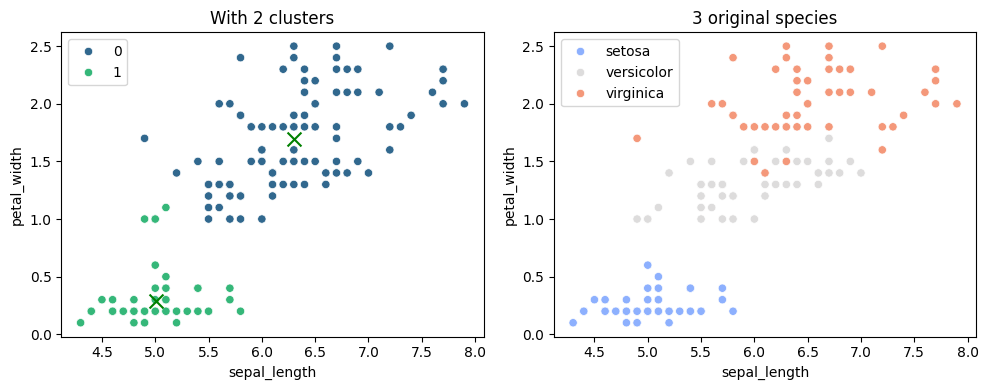

In [43]:
nb_col_x = 1
nb_col_y = 3

get_graphics(
    dataframe=df,
    x_column=columns[nb_col_x],
    y_column=columns[nb_col_y],
    color_column='species',
    labels=labels,
    x_cluster_centers=clusters_centers[:, nb_col_x],
    y_cluster_centers=clusters_centers[:, nb_col_y])

---
---

5. Idem pour 4 clusters

In [44]:
labels, clusters_centers, inertia = get_k_means_analyse(X, n_clusters=4)

------------------------------------------
--------------WITH 4 CLUSTERS-------------

--------------- CLUSTER CENTERS ----------
[[4.80731707 6.23658537 2.85853659 1.62195122]
 [1.462      5.006      3.428      0.246     ]
 [5.846875   6.9125     3.1        2.13125   ]
 [3.94074074 5.52962963 2.62222222 1.21851852]]

--------------- LABELS ----------
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 3 0 3 0 3 0 3 3 3 3 0 3 0 0 3 0 3 0 3 0 0
 0 0 0 0 0 3 3 3 3 0 3 0 0 0 3 3 3 0 3 3 3 3 3 0 3 3 2 0 2 2 2 2 3 2 2 2 0
 0 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 0 2 2 2 0 2 2 2 0 2 2 2 0 0
 2 0]

--------------- INERTIA ----------
57.25600931571815



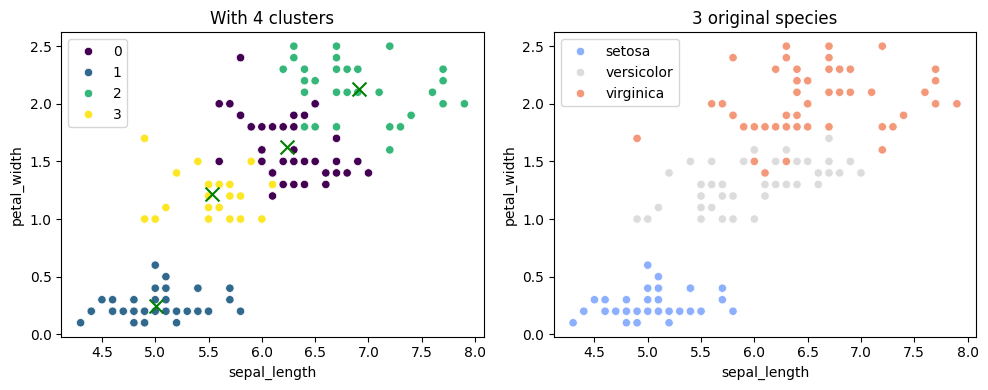

In [45]:
nb_col_x = 1
nb_col_y = 3

get_graphics(
    dataframe=df,
    x_column=columns[nb_col_x],
    y_column=columns[nb_col_y],
    color_column='species',
    labels=labels,
    x_cluster_centers=clusters_centers[:, nb_col_x],
    y_cluster_centers=clusters_centers[:, nb_col_y])

---
---

6. Évalue ton modèle en utilisant la méthode Elbow, entre 2 et 10 clusters, quel nombre cluster semble optimal ?

<Axes: xlabel='K_clusters'>

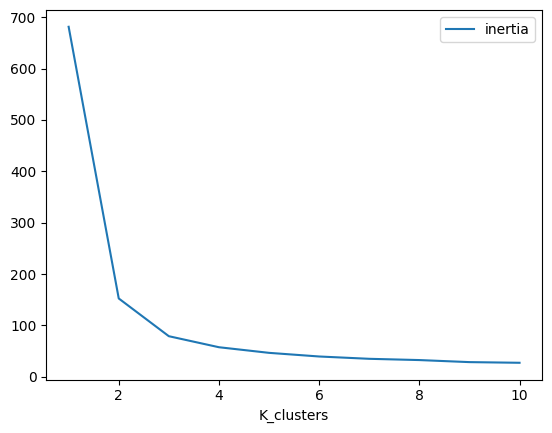

In [54]:
elbow = {
    'K_clusters' : np.arange(1,11),
    'inertia' : [get_k_means_analyse(X, n_clusters=i, print_in=False)[2] for i in np.arange(1, 11)]
}

df_elbow = pd.DataFrame(elbow)
df_elbow.plot(y='inertia', x="K_clusters")

With the __Elbow methode__ I can conclure than the optimal number of clusters is 3.

---
---

7. Évalue ton modèle en utilisant la méthode Silhouette, entre 2 et 10 clusters, quel nombre de clusters semble optimal ? Et toi, visuellement, si tu ne savais pas qu'il y avait 3 espèces, tu en aurais trouvé combien ?

<Axes: xlabel='K_clusters'>

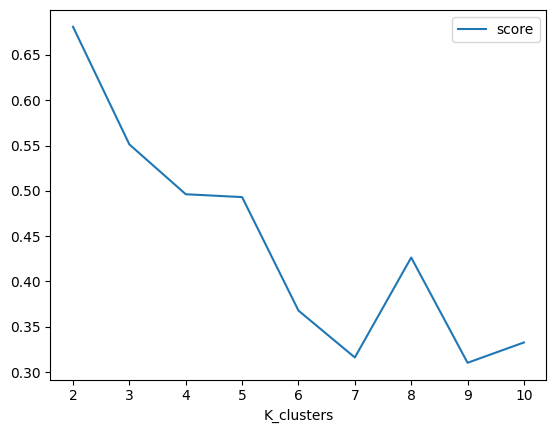

In [60]:
silhouette = {
    'K_clusters' : np.arange(2,11),
    'score' : [silhouette_score(X, get_k_means_analyse(X, n_clusters=i, print_in=False)[0]) for i in np.arange(2, 11)]
}

df_silhouette = pd.DataFrame(silhouette)
df_silhouette.plot(y='score', x="K_clusters")

The `max score` is for 2 clusters. Using the __Elbow method__ and the __Silhouette method_, I conclude that there are likely 2 species.

---
---